# ML Capstone Project

## Introduction/Business Problem

This project is meant to analyse the traffic data from Seattle - USA, specially all the collisions recorded and, with that, try to understand the major causes of accidents and predict when a collision is more likely to occur.

With this project, i'll try to reach anyone interested in the subject, but the main target audience are the people from the Seattle area, lawyers, traffic guards and city regulators.

## Data

For this project, i'll be using a dataset provided by the Seattle Traffic Management and the Seattle Traffic Records Group, in which is recorded every collision that happened since 2004, and it involves not only cars, but also pedestrians and bicycle. The data provided is very complete and contains various attributes to be analyzed, such as number of vehicles involved in the collision, whether or not the collision was due to inattention, speeding, conditions of the road, and so on.

I will try to determine the main cause of traffic collisions and what relations we can get from the data. For example, does the time of the day influences in traffic collisions? Are there a specific lane segment in the road more likely to traffic collisions occur?

In this project, i'll cross these information and try to find any relations between them. With that done, i'll try to predict when, where and what conditions have more influence in a traffic collision.

## Methodology

The methodology for this project will consist of, at first, data retrieval, analysis and preparation of the data. I'm using Jupyther Notebook to do all the work and presentation.

The first thing to do is prepare our environment, so let's import the python libraries needed:

In [2]:
import pandas as pd, numpy as np, matplotlib as mp, seaborn as sb
from matplotlib import pyplot as plt

Now we are reay to import the data

In [25]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
list(df.columns)

['SEVERITYCODE',
 'X',
 'Y',
 'OBJECTID',
 'INCKEY',
 'COLDETKEY',
 'REPORTNO',
 'STATUS',
 'ADDRTYPE',
 'INTKEY',
 'LOCATION',
 'EXCEPTRSNCODE',
 'EXCEPTRSNDESC',
 'SEVERITYCODE.1',
 'SEVERITYDESC',
 'COLLISIONTYPE',
 'PERSONCOUNT',
 'PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT',
 'INCDATE',
 'INCDTTM',
 'JUNCTIONTYPE',
 'SDOT_COLCODE',
 'SDOT_COLDESC',
 'INATTENTIONIND',
 'UNDERINFL',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'PEDROWNOTGRNT',
 'SDOTCOLNUM',
 'SPEEDING',
 'ST_COLCODE',
 'ST_COLDESC',
 'SEGLANEKEY',
 'CROSSWALKKEY',
 'HITPARKEDCAR']

Many of this columns aren't necessary for this analysis, so let's discard a few from our data frame:

In [26]:
df.drop(['OBJECTID',
 'INCKEY',
 'X',
 'Y',
 'COLDETKEY',
 'REPORTNO',
 'STATUS',
 'ADDRTYPE',
 'INTKEY',
 'EXCEPTRSNCODE',
 'EXCEPTRSNDESC',
 'COLLISIONTYPE',
 'PERSONCOUNT',
 'PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT',
 'INCDATE',
 'JUNCTIONTYPE',
 'SDOT_COLCODE',
 'SDOT_COLDESC',
 'PEDROWNOTGRNT',
 'SDOTCOLNUM',
 'ST_COLCODE',
 'ST_COLDESC',
 'SEGLANEKEY',
 'CROSSWALKKEY',
 'SPEEDING',
 'INATTENTIONIND',
 'HITPARKEDCAR'], axis=1, inplace=True)

In [27]:
df.head()

,SEVERITYCODE,LOCATION,SEVERITYCODE.1,SEVERITYDESC,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,2,5TH AVE NE AND NE 103RD ST,2,Injury Collision,3/27/2013 2:54:00 PM,N,Overcast,Wet,Daylight
1,1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,Property Damage Only Collision,12/20/2006 6:55:00 PM,0,Raining,Wet,Dark - Street Lights On
2,1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,Property Damage Only Collision,11/18/2004 10:20:00 AM,0,Overcast,Dry,Daylight
3,1,2ND AVE BETWEEN MARION ST AND MADISON ST,1,Property Damage Only Collision,3/29/2013 9:26:00 AM,N,Clear,Dry,Daylight
4,2,SWIFT AVE S AND SWIFT AV OFF RP,2,Injury Collision,1/28/2004 8:04:00 AM,0,Raining,Wet,Daylight


Now it looks better.

According with the data documentation, the SEVERITYCODE is a code that corresponds to the severity of the
collision:

• 3—fatality

• 2b—serious injury

• 2—injury

• 1—prop damage

• 0—unknown

So, let's check our data and see the how many cases we have for each kind of severity code:

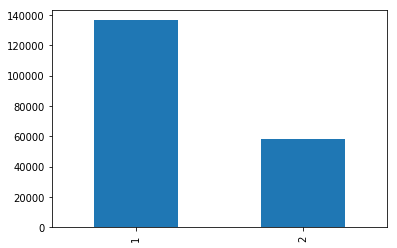

In [14]:
df['SEVERITYCODE'] = pd.to_numeric(df['SEVERITYCODE'])
df['SEVERITYCODE'].value_counts().plot(kind='bar')

Let's try to find now if there's any particular condition that we can attribute to be a main cause of collisions. I'll try with the Weather, Road Condition, Light Condition

In [15]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [16]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [17]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

## Results

After analysing and preparing the data, we could determine that most of the collisions happen when the weather is clear, the roads are dry and it's still daylight.

## Discussion and Conclusion

Maybe a common knowledge is that most collisions happen during nightime, under bad weather and poor road conditions. But after this project, it's easy to determine that it's the other way around.

With that in mind, we can determine that what could really improve the road saffety is to create educational programs and a marketing campaing urging the drives to be more careful and respect the traffic laws.